# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [3]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

22 inf
22 22
22 22
22 22
22 22
12 22
8 12
7 8
1000.0


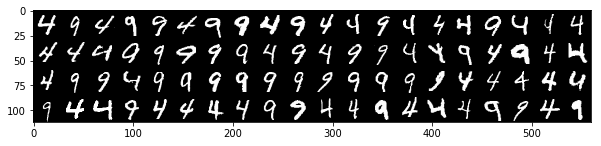

In [4]:
show_digit(X)
# Do feature normalization here
# begin answer
P, N = X.shape
X_avg = np.average(X, axis=1).reshape(P, 1)
X_std = np.std(X, axis=1).reshape(P, 1)
X_std = np.where(X_std == 0,1,X_std)
X = (X - X_avg) / X_std
# end answer

# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')

from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_val = X[:, j].reshape(P, 1)
        X_val = np.vstack(([[1]], X_val))
        y_val = y[0, j]
        X_ = np.delete(X, j, axis=1)
        y_ = np.delete(y, j)
        w = ridge(X_, y_, lmbdas[i])
        E_val = E_val + (0 if np.sign(np.matmul(w.T, X_val)) == y_val else 1)
    # Update lmbda according validation error
    # begin answer
    print(E_val, E_val_min)
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer
print(lmbda)

In [7]:
# Compute training error
w = ridge(X, y, lmbda)

X_train = np.vstack((np.ones((1, N)), X))
train_error = np.sum(np.sign(np.matmul(w.T, X_train)) != y)
print(train_error / N)

# Do feature normalization to X_test
P_t, N_t = X_test.shape
X_test_avg = np.average(X_test, axis=1).reshape(P_t, 1)
X_test_std = np.std(X_test, axis=1).reshape(P_t, 1)
X_test_std = np.where(X_test_std == 0,1,X_test_std)
X_test = (X_test - X_test_avg) / X_test_std
# Compute test error
X_t_test = np.vstack((np.ones((1, N_t)), X_test))
test_error = np.sum(np.sign(np.matmul(w.T, X_t_test)) != y_test)
print(test_error / N_t)

0.01
0.055248618784530384


### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [17]:
from logistic_r import logistic_r

lmbda = 0
E_val_min = float('inf')
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_val = X[:, j].reshape(P, 1)
        X_val = np.vstack(([[1]], X_val))
        y_val = y[0, j]
        X_ = np.delete(X, j, axis=1)
        y_ = np.delete(y, j)
        w = logistic_r(X_, y_, lmbdas[i])
        E_val = E_val + (0 if np.sign(np.matmul(w.T, X_val)) == y_val else 1)
    # Update lmbda according validation error
    # begin answer
    print(E_val, E_val_min)
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer
print(lmbda)

4 inf
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0.001


In [19]:
# Compute training error
w = logistic_r(X, y, 0)
X_train = np.vstack((np.ones((1, N)), X))
train_error = np.sum(np.sign(np.matmul(w.T, X_train)) != y)
print(train_error / N)

# Compute test error
X_t_test = np.vstack((np.ones((1, N_t)), X_test))
test_error = np.sum(np.sign(np.matmul(w.T, X_t_test)) != y_test)
print(test_error / N_t)

0.0
0.051230537418382724
